# Diode Mixer Example
In this system $S(t)$ describes the voltage of an amplitude modulated signal, $S_{LO}(t)$ describes the voltage of a local oscialtor, and $S_{in}(t)=S_{LO}(t)+S(t)$ is the sum of the local oscialtor voltage and the am signal voltage. <br>
The signal $S_{in}(t)$ is sent to an ideal diode, which acts according to the equation
$$ I=I_S\left( e^{\frac{qV_D}{nkT}} -1\right).$$
In this equation all constants are considered to be unity, except for $V_D$ which is the input voltage $S_{in}(t)$.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as ss

The carrier signal of $S$ is a sinewave with frequency=300Hz, amplitude=1, and phase=0. The modulation signal is a sinewave with frequency=10, amplitude=1, and phase=0.

In [22]:
# Defining the modulation signal
fc = 300
fm = 10
twopi = np.pi*2
t = np.linspace(0, 1, 1000)

Sc = np.sin(t*twopi*fc)
Sm = 0.5*np.sin(t*twopi*fm)

S = (1+Sm)*Sc

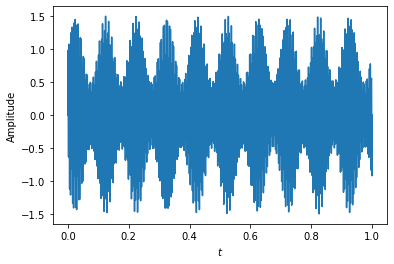

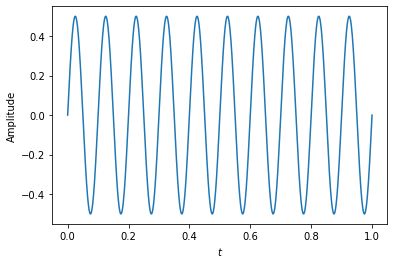

In [23]:
# plotting the modulated signal
plt.plot(t, S)
plt.xlabel(r"$t$")
plt.ylabel("Amplitude")
plt.savefig("Modulated_signal.pdf")
plt.show()
plt.plot(t, Sm)
plt.xlabel(r"$t$")
plt.ylabel("Amplitude")
plt.savefig("Modulation_signal.pdf")
plt.show()

Here the local oscilator signal is defined, with a frequency of 150Hz, a phase of 0, and an amplitude of 1.

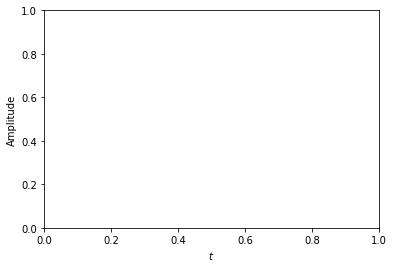

In [24]:
# Defining the local oscilator
fo = 150
So = np.sin(twopi*t*fo)
plt.plot(t, So)
plt.xlabel(r"$t$")
plt.ylabel("Amplitude")
plt.savefig("LO_signal.pdf")
plt.show()

In [25]:
# Input voltage
v_in = So+S

# Output current (all constant are unity)
# Measured over a unity resistor I = output voltage
I = np.exp(v_in)-1

The output of the diode is noted as $I$. While this value is measured in ampere, it is assumed that a voltage drop over a unity resistor is measured (such that the voltage and current of the output are equal)

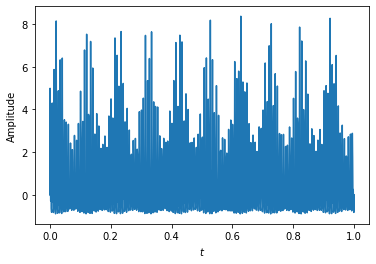

In [26]:
# plotting output current/voltage over unity resistance
plt.plot(t, I)
plt.xlabel(r"$t$")
plt.ylabel("Amplitude")
plt.savefig("Mixed_signal.pdf")
plt.show()

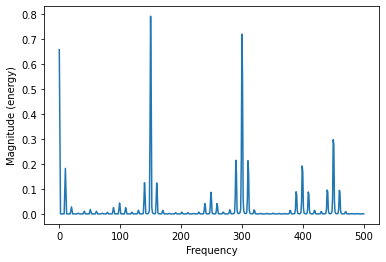

In [27]:
# Finding the spectrum of the mixed signal
spec, freqs, _l = plt.magnitude_spectrum(I, len(t))
plt.savefig("spectrogram.pdf")

We see the largest peaks at $f_{o}$, $f_c$, and their harmonics. Zooming in on one of these peaks shows how the distance between the peaks and their sidelobes correspond to a shift in $f_m$ Hz

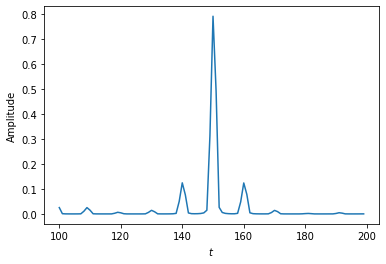

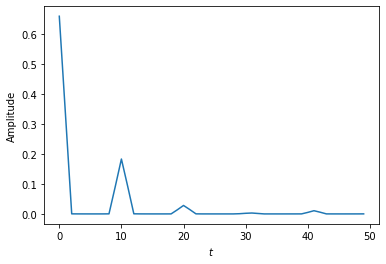

In [28]:
plt.plot(freqs[100:200], spec[100:200])
plt.xlabel(r"$t$")
plt.ylabel("Amplitude")
plt.savefig("spectrogram_zoom.pdf")
plt.show()
plt.plot(freqs[:50], spec[:50])
plt.xlabel(r"$t$")
plt.ylabel("Amplitude")
plt.savefig("spectrogram_zoom_origin.pdf")
plt.show()

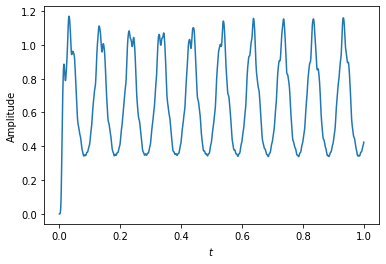

Text(0.5, 1.0, 'Zero-meaned filtered signal')

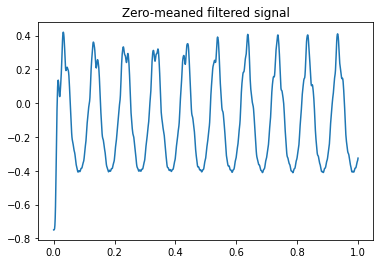

In [29]:
# Filtering the mixed signal
b,a = ss.butter(6, twopi*fm, fs=len(t))
sm_filtered = ss.lfilter(b, a, I)

# plotting the filtered signal
plt.plot(t, sm_filtered)
plt.xlabel(r"$t$")
plt.ylabel("Amplitude")
plt.savefig("filtered_signal.pdf")
plt.show()

# plotting a zero-meaned version of te filtered signal
meaned_filtered = sm_filtered - 0.75
_fig, _ax = plt.subplots()
_ax.plot(t, meaned_filtered)
_ax.set_title("Zero-meaned filtered signal")

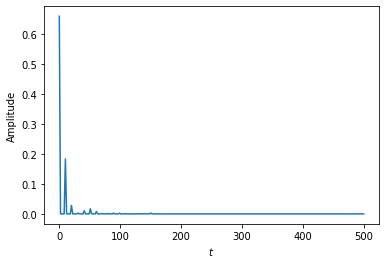

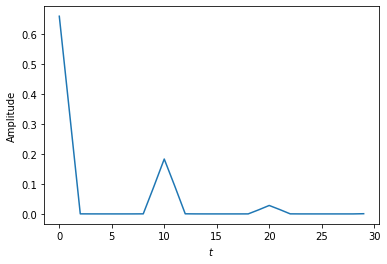

In [30]:
# plotting the spectrum of the filtered signal
spec, freqs_filtered, _l = plt.magnitude_spectrum(sm_filtered, len(t))
plt.xlabel(r"$t$")
plt.ylabel("Amplitude")
plt.savefig("spectrogram_filtered.pdf")
plt.show()
plt.plot(freqs_filtered[:30], spec[:30])
plt.xlabel(r"$t$")
plt.ylabel("Amplitude")
plt.savefig("spectrogram_filtered_zoom.pdf")
plt.show()

We still see a large value in the spectrum at $f=0$, since there is a constant shift in our signal's amplitude. Disregarding this we see that the largest value of the spectrum can be found at $f=10$, which is the frequency of the input signal.<br>
Notive how there is a small loss in signal strength, and a lot of noise has been added to the signal (the amplitude of $S_m$ is 0.5, the amplitude of the filtered signal is around 0.4.